# Step 8: Train linear regression model

This model will serve as a baseline for later regression models. We need to complete the following steps:
1. Prepare data
2. Load and save the model
3. Setup logging
4. Train model

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import keras.backend as K
K.clear_session()

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

## Prepare data

In [4]:
from tep.utils import load_array
feats = load_array("data/auxiliary_features.bc")
labels = load_array("data/regression_labels.bc")
print(feats.shape)
print(labels.shape)

(1293005, 15)
(1293005,)


In [5]:
# transform labels to log(x+1) in order to account for zero values
import numpy as np
print(labels[:20])
labels = np.log1p(labels)
print(labels[:20])

[  0   2 230   0   0  51   6   0   5   1  76   2   4   3   0   0   1   0
  52   0]
[0.         1.09861229 5.44241771 0.         0.         3.95124372
 1.94591015 0.         1.79175947 0.69314718 4.34380542 1.09861229
 1.60943791 1.38629436 0.         0.         0.69314718 0.
 3.97029191 0.        ]


## Load and save model

In [6]:
from tep.trainUtils import r2

In [7]:
from tep.linearModel import regression_model
model = regression_model(feats.shape[1], metrics=[r2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 76
Trainable params: 46
Non-trainable params: 30
_________________________________________________________________


In [8]:
# save model architecture
from tep.modelUtils import save_architecture
model_name = "lin_reg"
model_path = "models/" + model_name
save_architecture(model, model_path + ".json")

## Setup logging

In [9]:
!mkdir $model_path

mkdir: cannot create directory ‘models/lin_reg’: File exists


In [10]:
!rm $model_path/*

In [11]:
from tep.trainUtils import get_callbacks
cbs = get_callbacks(model_name=model_name, log_dir=model_path, verbose=1)

Instructions for updating:
Use the retry module or similar alternatives.


## Train the model

In [12]:
# use settings for testing on sample
#train_size = 10000
#val_size = 1000
#batch_size = 64

# use settings for running on full data
val_size = 10000
train_size = feats.shape[0] - val_size
batch_size = 512

In [13]:
# now, we can train the model for the first time
model.fit(feats[:train_size], 
          labels[:train_size], 
          validation_data=(feats[-val_size:], labels[-val_size:]), 
          batch_size=batch_size, 
          epochs=100, 
          verbose=2,
          shuffle=True,
          callbacks=cbs)

Train on 1283005 samples, validate on 10000 samples
Epoch 1/100
 - 9s - loss: 3.1493 - r2: 0.3097 - val_loss: 2.9145 - val_r2: 0.3599

Epoch 00001: val_loss improved from inf to 2.91453, saving model to models/lin_reg.hdf5
Epoch 2/100
 - 9s - loss: 2.9053 - r2: 0.3629 - val_loss: 2.8660 - val_r2: 0.3707

Epoch 00002: val_loss improved from 2.91453 to 2.86605, saving model to models/lin_reg.hdf5
Epoch 3/100
 - 9s - loss: 2.8968 - r2: 0.3646 - val_loss: 2.8683 - val_r2: 0.3702

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 9s - loss: 2.8979 - r2: 0.3642 - val_loss: 2.8654 - val_r2: 0.3708

Epoch 00004: val_loss improved from 2.86605 to 2.86544, saving model to models/lin_reg.hdf5
Epoch 5/100
 - 9s - loss: 2.8994 - r2: 0.3639 - val_loss: 2.8636 - val_r2: 0.3712

Epoch 00005: val_loss improved from 2.86544 to 2.86356, saving model to models/lin_reg.hdf5
Epoch 6/100
 - 9s - loss: 2.8965 - r2: 0.3645 - val_loss: 2.8642 - val_r2: 0.3711

Epoch 00006: val_loss did not improve
Epoch 7/10

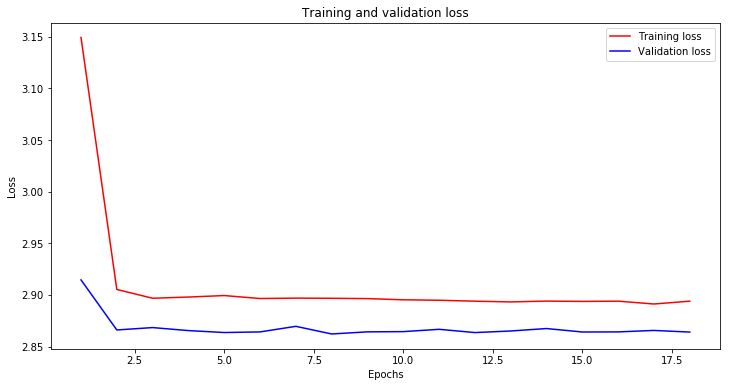

In [14]:
from tep.trainUtils import plot_loss
history = cbs[2]
plot_loss(history)

In [15]:
from tep.trainUtils import print_regression_metrics
print_regression_metrics(history)

loss: 2.896712143858864, r2: 0.36471158541065446, val_loss: 2.862160450363159, val_r2: 0.3714916025161743
